In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Function for renaming samples in order to groupy them together.
Finds the nth (in this case 3rd) to last occurance of "_". 

In [105]:
def find_nth_overlapping(haystack: str, needle: str, n: int):
    # Finds the nth-to-last occurnace of str ("needle") in the string ("haystack").
    # Returns index of string.
    
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+1)
        n -= 1
    return start


##### Testing the function to make sure it splits in the correct place.

In [ ]:
for s in data["Sample Name"]:
    a = s[:len(s)-find_nth_overlapping(s[::-1],"_",3)]+"["+s[len(s)-find_nth_overlapping(s[::-1],"_",3)+4:]
    print(a)

## Read the data
Data must be all on a single sheet in excel. You can reference a specific sheet in the excel file by using pd.read_excel('./file_path.xlsx)[sheet_number] - I think...

In [97]:
data = pd.read_excel('./data/science_data.xlsx')

In [106]:
# Display data
data

,Sample Name,weight factor,Acquisition Date & Time,Dilution Factor,Acq. Method Name,Component Name,Component Type,Mass Info,Component Group Name,Conc. Units,...,Faktor Trp,Area,Retention Time,Used,Calculated Concentration,Ion Ratio,con *weight factor,cal con weight * Fac D5Trp,cal con weight * Fac nanodrop,sample
0,WT_1.1_1_16hr-28092021,0.998004,2021-09-28 17:11:00,4,Polyamines 28092021.dam,C13 agmatine 2,Qualifiers,136.1 / 76.1,agmatin C13,nM,...,1.288531,384500,3.43,True,190.80,1.4336,190.419162,245.360973,267.920680,WT_1_16hr-28092021
1,WT_1.2_1_16hr-28092021,0.988142,2021-09-28 18:17:56,4,Polyamines 28092021.dam,C13 agmatine 2,Qualifiers,136.1 / 76.1,agmatin C13,nM,...,1.218435,1102000,3.43,True,547.10,3.0496,540.612648,658.701272,801.289739,WT_1_16hr-28092021
2,WT_2.1_1_16hr-28092021,1.008065,2021-09-28 19:24:49,4,Polyamines 28092021.dam,C13 agmatine 2,Qualifiers,136.1 / 76.1,agmatin C13,nM,...,2.305080,320600,3.45,True,159.10,1.8151,160.383065,369.695874,143.507120,WT_1_16hr-28092021
3,WT_2.2_1_16hr-28092021,0.996016,2021-09-28 20:31:48,4,Polyamines 28092021.dam,C13 agmatine 2,Qualifiers,136.1 / 76.1,agmatin C13,nM,...,1.843878,125400,3.44,True,62.25,1.5428,62.001992,114.324131,58.158068,WT_1_16hr-28092021
4,WT_3.1_1_16hr-28092021,0.996016,2021-09-28 21:38:44,4,Polyamines 28092021.dam,C13 agmatine 2,Qualifiers,136.1 / 76.1,agmatin C13,nM,...,1.342283,665100,3.45,True,330.10,2.3386,328.784861,441.322254,337.772806,WT_1_16hr-28092021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,T10_26.2_1.2_10_24hr-28092021,1.010101,2021-09-29 01:55:17,4,Polyamines 28092021 low C13 AS.dam,Gaba 1,Quantifiers,104.1 / 87.0,Gaba,nM,...,0.407885,150100000,2.95,True,87100.00,0.1819,87979.797980,35885.661777,98176.690274,T10_26.2_10_24hr-28092021
824,T10_26.2_2.1_10_24hr-28092021,1.000000,2021-09-29 03:02:11,4,Polyamines 28092021 low C13 AS.dam,Gaba 1,Quantifiers,104.1 / 87.0,Gaba,nM,...,1.014911,210300000,2.98,True,122000.00,0.1943,122000.000000,123819.175428,152827.956989,T10_26.2_10_24hr-28092021
825,T10_26.2_2.2_10_24hr-28092021,0.998004,2021-09-29 04:09:09,4,Polyamines 28092021 low C13 AS.dam,Gaba 1,Quantifiers,104.1 / 87.0,Gaba,nM,...,0.517455,169900000,2.96,True,98550.00,0.0945,98353.293413,50893.435807,145778.100288,T10_26.2_10_24hr-28092021
826,T10_26.2_3.1_10_24hr-28092021,0.996016,2021-09-29 05:16:06,4,Polyamines 28092021 low C13 AS.dam,Gaba 1,Quantifiers,104.1 / 87.0,Gaba,nM,...,0.863730,308700000,2.94,True,179100.00,0.0997,178386.454183,154077.693479,138546.812749,T10_26.2_10_24hr-28092021


### Create "Sample" Variable in order to group together each sample for calculating means etc.

In [99]:
data["sample"] = [s[:len(s)-find_nth_overlapping(s[::-1],"_",3)]+s[len(s)-find_nth_overlapping(s[::-1],"_",3)+4:] for s in data["Sample Name"]]

##### Drop all "stop" samples. Remove this line if they are also to be displayed in the graph.

In [100]:
data = data[~data['sample'].str.contains("stop")]

### Create graphs.

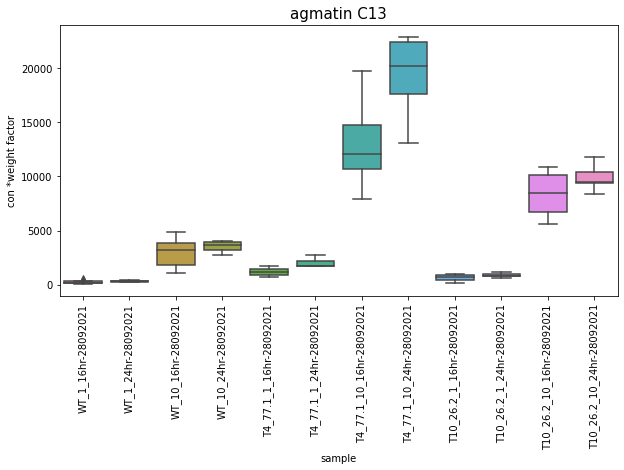

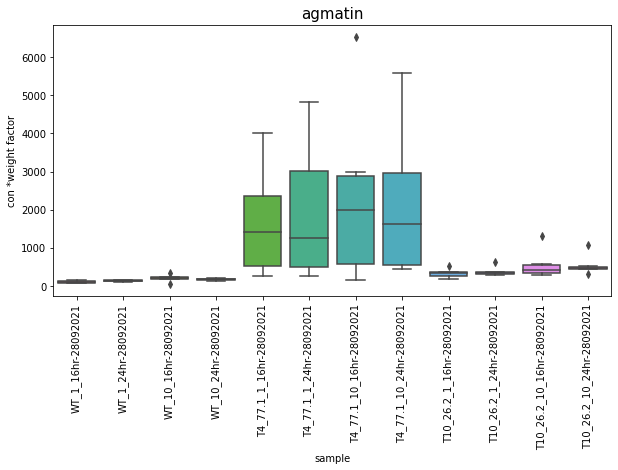

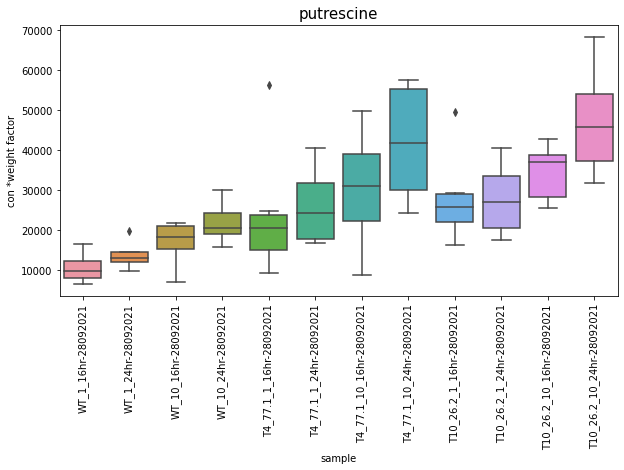

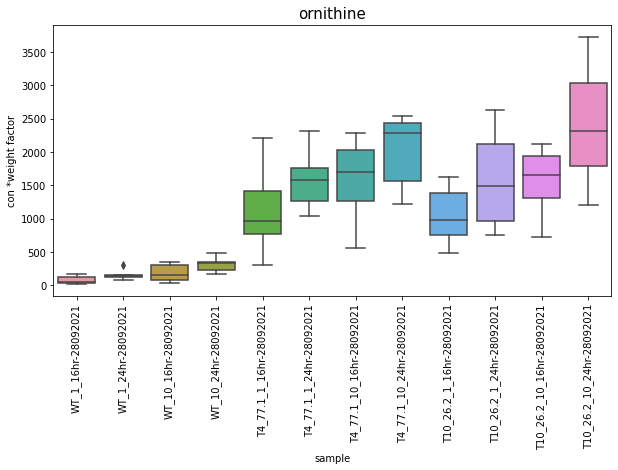

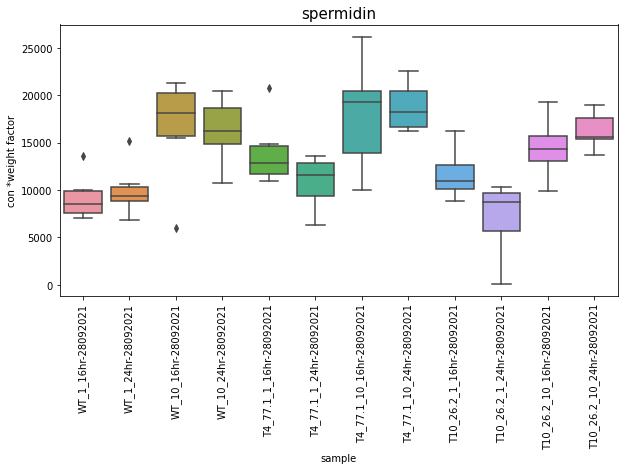

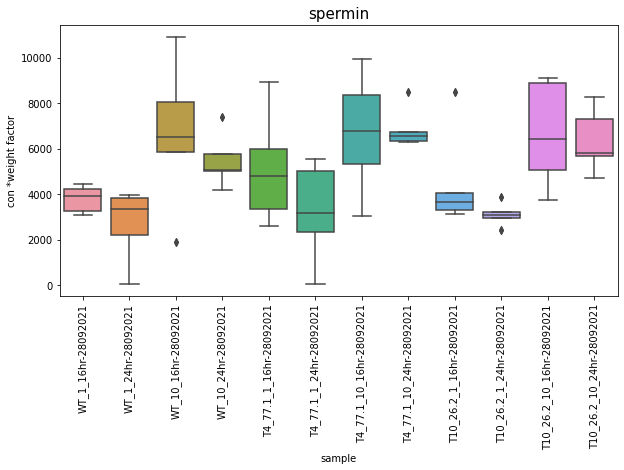

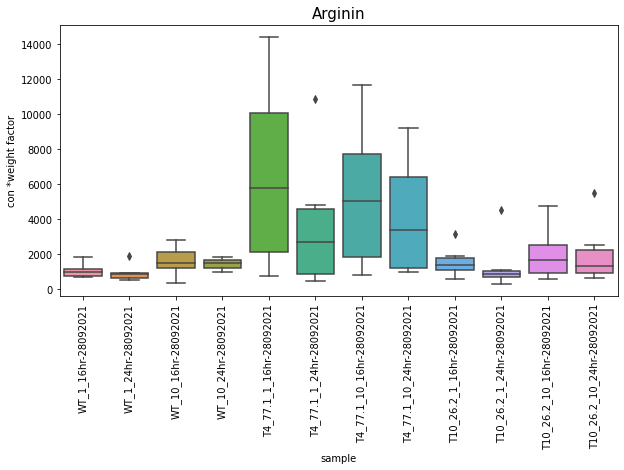

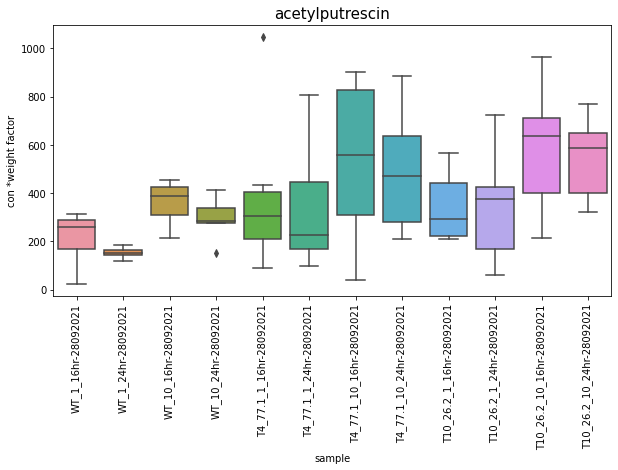

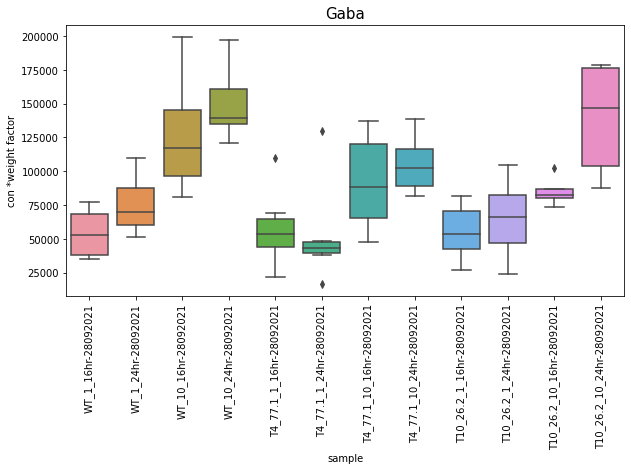

In [109]:
# For each Component Group (name), create an individual graph.
for group in data["Component Group Name"].unique():
    data_x = data[data["Component Group Name"]==group]

    plt.subplots(figsize=(10,5))
    plt.title(group,fontsize=15)
    
    # Using seaborns pre-built boxplot to plot the data. Can change this to display the exact graph.
    ax = sns.boxplot(data=data_x, y="con *weight factor", x="sample" )
    plt.xticks(rotation=90)
    plt.show()
    #plt.save("name_of_file") to save the graphs instead of display them.

